# This example demonstrate how to train region classification (standart image classification model).

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)

In [4]:
%matplotlib inline 

In [5]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("numberplate_options")
PATH_TO_DATASET = info["dataset_path"]
PATH_TO_TMP_CUSTOM_DATASET = f'{PATH_TO_DATASET}_base'

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [6]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-09-03'

In [7]:
PATH_TO_TMP_CUSTOM_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-09-03_base'

In [8]:
DATASET_NAME = "options"
VERSION = "2021_11_19_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [9]:
from NomeroffNet.tools import custom_options
from NomeroffNet import OptionsDetector

class_region_custom = [
    ["military-ru","military-ua"],
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "ru",
    "kz",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "by",
    "su",
    "kg",
    "am"
]

class_count_lines_custom = ["1", "2", "3"]

customOptionsMaker = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_TMP_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom
)
customOptionsMaker.make()

In [10]:
customOptionsMaker.rebalance_regions('train', True, True)

In [11]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military-ru,military-ua",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 200
        self.batch_size       = 32
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295

In [12]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_TMP_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [13]:
# train
lr_finder = npClassificator.tune()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | inp_conv        | Conv2d      | 896   
1  | conv1           | Conv2d      | 18.5 K
2  | conv2           | Conv2d      | 73.9 K
3  | conv3           | Conv2d      | 147 K 
4  | pool            | MaxPool2d   | 0     
5  | dropout_reg     | Dropout     | 0     
6  | fc1_reg         | Linear      | 2.1 M 
7  | fc2_reg         | Linear      | 131 K 
8  | batch_norm_reg  | BatchNorm1d | 1.0 K 
9  | fc3_reg         | Linear      | 3.9 K 
10 | dropout_line    | Dropout     | 0     
11 | fc1_line        | Linear      | 2.1 M 
12 | fc2_line        | Linear      | 131 K 
13 | batch_norm_line | BatchNorm1d | 1.0 K 
14 | fc3_line        | Linear      | 771   
-------------------------------------------------
4.7 M     Trainable params
0         Non-trainable params
4.7 M     Total params

Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Learning rate set to 0.5754399373371567


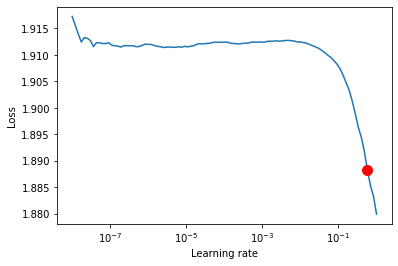

In [14]:
%matplotlib inline
# Results can be found in
lr_finder["lr_find"].results

# Plot with
fig = lr_finder["lr_find"].plot(suggest=True)
fig.show()

In [15]:
# train
model = npClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | inp_conv        | Conv2d      | 896   
1  | conv1           | Conv2d      | 18.5 K
2  | conv2           | Conv2d      | 73.9 K
3  | conv3           | Conv2d      | 147 K 
4  | pool            | MaxPool2d   | 0     
5  | dropout_reg     | Dropout     | 0     
6  | fc1_reg         | Linear      | 2.1 M 
7  | fc2_reg         | Linear      | 131 K 
8  | batch_norm_reg  | BatchNorm1d | 1.0 K 
9  | fc3_reg         | Linear      | 3.9 K 
10 | dropout_line    | Dropout     | 0     
11 | fc1_line        | Linear      | 2.1 M 
12 | fc2_line        | Linear      | 131 K 
13 | batch_norm_line | BatchNorm1d | 1.0 K 
14 | fc3_line        | Linear      | 771   
-------------------------------------------------
4.7 M     Trainable params
0         Non-trainable params
4.7 M     Total params

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/train/lightning_logs/version_3/checkpoints/epoch=53-step=50651.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.59375,
 'test_acc_line_epoch': 0.9983941912651062,
 'test_acc_reg': 0.59375,
 'test_acc_reg_epoch': 0.9933005571365356,
 'test_accuracy': 0.59375,
 'test_accuracy_epoch': 0.9958474040031433,
 'test_loss': 1.1841068267822266,
 'test_loss_epoch': 1.1884313821792603}
--------------------------------------------------------------------------------


In [16]:
npClassificator.prepare(PATH_TO_DATASET, verbose=1)

START PREPARING
DATA PREPARED


In [17]:
npClassificator.test()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.59375,
 'test_acc_line_epoch': 0.9983941912651062,
 'test_acc_reg': 0.59375,
 'test_acc_reg_epoch': 0.9933005571365356,
 'test_accuracy': 0.59375,
 'test_accuracy_epoch': 0.9958474040031433,
 'test_loss': 1.1841068267822266,
 'test_loss_epoch': 1.1884313821792603}
--------------------------------------------------------------------------------


[{'test_loss_epoch': 1.1884313821792603,
  'test_accuracy_epoch': 0.9958474040031433,
  'test_acc_reg_epoch': 0.9933005571365356,
  'test_acc_line_epoch': 0.9983941912651062,
  'test_loss': 1.1841068267822266,
  'test_accuracy': 0.59375,
  'test_acc_reg': 0.59375,
  'test_acc_line': 0.59375}]

In [18]:
npClassificator.save(RESULT_PATH)

model save to /var/www/nomeroff-net24/./data/models/numberplate_options_2021_11_19_pytorch_lightning.ckpt


# Classification Report

In [19]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (inp_conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout_reg): Dropout(p=0.2, inplace=False)
  (fc1_reg): Linear(in_features=4096, out_features=512, bias=True)
  (fc2_reg): Linear(in_features=512, out_features=256, bias=True)
  (batch_norm_reg): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3_reg): Linear(in_features=256, out_features=15, bias=True)
  (dropout_line): Dropout(p=0.2, inplace=False)
  (fc1_line): Linear(in_features=4096, out_features=512, bias=True)
  (fc2_line): Linear(in_features=512, out_features=256, bias=True)
  (batch_norm_line): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3_line): Linear(

In [20]:
from NomeroffNet.data_modules.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
import torch

def options_classification_report(npClassificator, 
                                  path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"), 
                                  mode_torch="gpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.model.cuda()
        with torch.no_grad():
            outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        out_idx_line_all.extend(out_idx_line)
        label_idx_reg_all.extend(label_idx_reg)
        label_idx_line_all.extend(label_idx_line)
    #print("npClassificator.class_region", npClassificator.class_region)
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.get_class_region_for_report()))
    print("\n\ncount lines classification report:")
    print(classification_report(label_idx_line_all, 
                                out_idx_line_all, 
                                target_names=npClassificator.count_lines))

In [21]:
options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"))



class region classification report:
                         precision    recall  f1-score   support

military-ru,military-ua       1.00      1.00      1.00       101
             eu-ua-2015       0.99      1.00      0.99      1098
             eu-ua-2004       1.00      1.00      1.00      1052
             eu-ua-1995       1.00      1.00      1.00       917
                     eu       1.00      0.98      0.99      1000
             xx-transit       1.00      1.00      1.00       412
                     ru       1.00      1.00      1.00       188
                     kz       1.00      0.99      0.99       670
        eu-ua-ordlo-dpr       0.89      1.00      0.94        48
        eu-ua-ordlo-lpr       0.97      1.00      0.98        30
                     ge       1.00      0.99      0.99       374
                     by       0.92      0.96      0.94        23
                     su       0.98      0.99      0.98       272
                     kg       0.99      0.97      0

# Check small accuracy images

In [22]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military-ru,military-ua",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 200
        self.batch_size       = 32
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_TMP_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [23]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (inp_conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout_reg): Dropout(p=0.2, inplace=False)
  (fc1_reg): Linear(in_features=4096, out_features=512, bias=True)
  (fc2_reg): Linear(in_features=512, out_features=256, bias=True)
  (batch_norm_reg): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3_reg): Linear(in_features=256, out_features=15, bias=True)
  (dropout_line): Dropout(p=0.2, inplace=False)
  (fc1_line): Linear(in_features=4096, out_features=512, bias=True)
  (fc2_line): Linear(in_features=512, out_features=256, bias=True)
  (batch_norm_line): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3_line): Linear(

In [24]:
%matplotlib inline

In [25]:
#npClassificator.class_region = npClassificator.get_class_region_for_report()

In [26]:
from NomeroffNet.data_modules.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"), 
              mode_torch="gpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

# (npClassificator, 
#               path_dir=os.path.join(PATH_TO_DATASET, "test"), 
#               mode_torch="gpu", 
#               min_acc=0.75):
#     imageGenerator = ImgGenerator(
#         path_dir,
#         npClassificator.width,
#         npClassificator.height,
#         npClassificator.batch_size,
#         [len(npClassificator.class_region), len(npClassificator.count_lines)])
#     print("start imageGenerator build")
#     imageGenerator.build_data()
#     print("end imageGenerator build")
#     gen = imageGenerator.path_generator()
    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            cnt_all += 1
            if o != l:
                print("[WRONG REGION PREDICTED] pred", o, l, p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC REGION PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
        # check line
#         for o, l, p, tens in zip(out_idx_line, label_idx_line, img_paths, outputs[1]):
#             if o != l:
#                 print("[WRONG LINE PREDICTED]  pred", o, l, p)
#                 show_img(p)
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC LINE PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
    

In [28]:
#small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"))

In [ ]:
#small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "train"))

In [ ]:
#small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "val"))